In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
dados = 'filmes.json'
filmes = pd.read_json(dados)
filmes.head()

NameError: name 'pd' is not defined

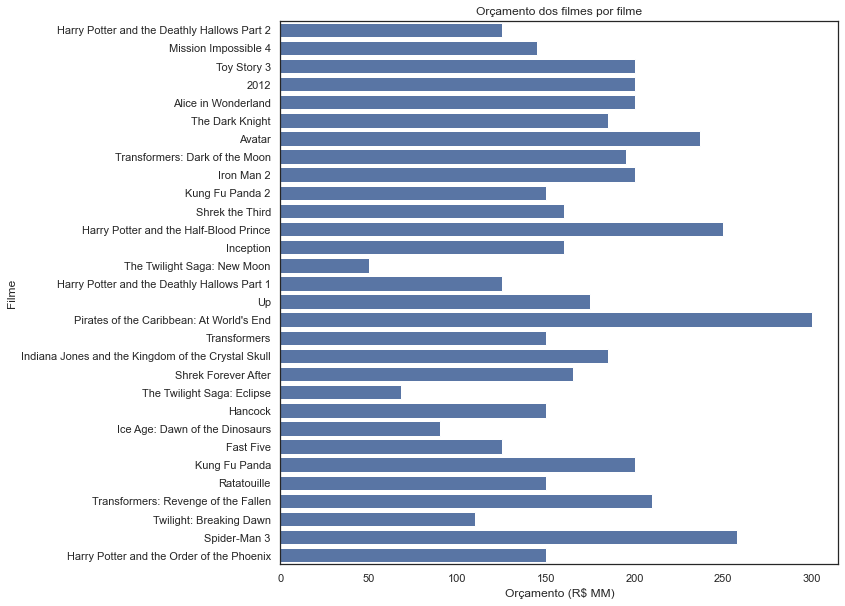

Maior orçamento: Pirates of the Caribbean: At World's End
Menor Orçamento: The Twilight Saga: New Moon


In [53]:
# Plotando o gráfico de orçamento por flme
sns.set(style='white')
plt.figure(figsize=(10, 10))
plt.title('Orçamento por filme')
sns.barplot(y='Film', x='Budget_M', color='b', estimator=sum, data=filmes, ci=None)
plt.xlabel('Orçamento (R$ MM)')
plt.ylabel('Filme')
plt.show()

# Localizando os filmes com maior e menor orçamentos
maior = np.array(filmes[filmes['Budget_M'] == filmes['Budget_M'].max()]['Film'])[0]
menor = np.array(filmes[filmes['Budget_M'] == filmes['Budget_M'].min()]['Film'])[0]
print('Maior orçamento: {}\nMenor Orçamento: {}'.format(maior, menor))

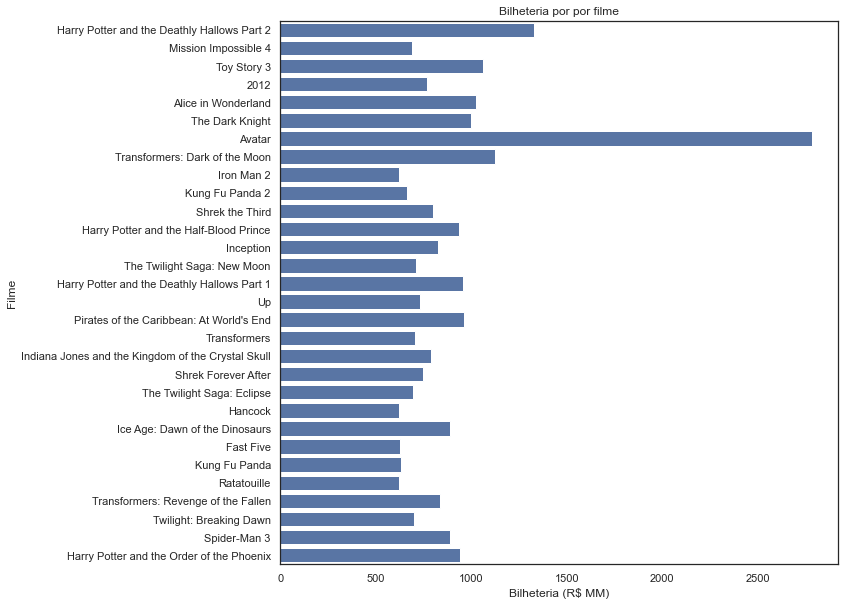

Maior bilheteria: Avatar
Menor bilheteria: Ratatouille


In [364]:
# Plotando o gráfico de orçamento por flme
sns.set(style='white')
plt.figure(figsize=(10, 10))
plt.title('Bilheteria por por filme')
sns.barplot(y='Film', x='Worldwide_Gross_M', color='b', estimator=sum, data=filmes, ci=None)
plt.xlabel('Bilheteria (R$ MM)')
plt.ylabel('Filme')
plt.show()

# Localizando os filmes com maior e menor orçamentos
maior = np.array(filmes[filmes['Worldwide_Gross_M'] == filmes['Worldwide_Gross_M'].max()]['Film'])[0]
menor = np.array(filmes[filmes['Worldwide_Gross_M'] == filmes['Worldwide_Gross_M'].min()]['Film'])[0]
print('Maior bilheteria: {}\nMenor bilheteria: {}'.format(maior, menor))

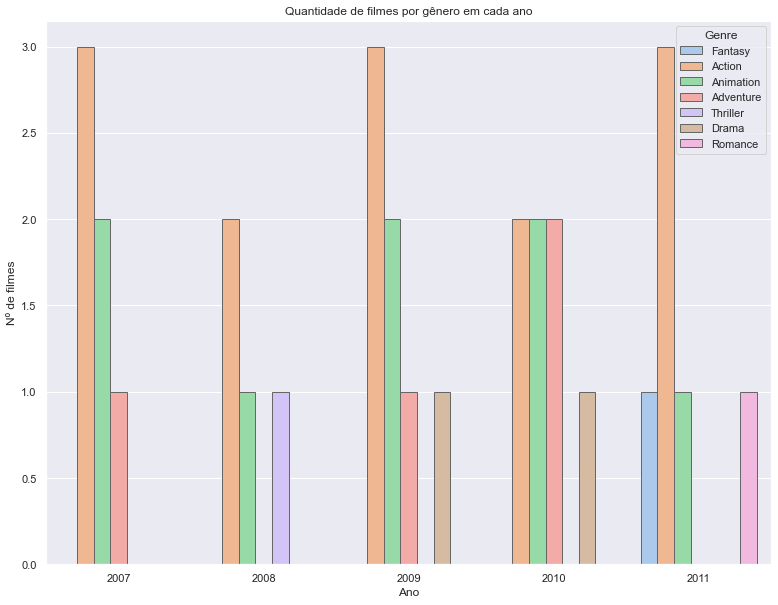

Os anos com as menores quantidades de filmes do gênero Animation são [2011, 2008]

Os anos com as menores quantidades de filmes do gênero Action são [2010, 2008]



In [361]:
# Plotando o gráfico de filmes produzidos por gênero em cada ano
sns.set(style='darkgrid')
plt.figure(figsize=(13, 10))
plt.title('Quantidade de filmes por gênero em cada ano')
sns.countplot(x='Year', hue='Genre', data=filmes, color='orange', palette='pastel', edgecolor='0.4')
plt.xlabel('Ano')
plt.ylabel('Nº de filmes')
plt.show()

# Localizando os anos com menores produções de filmes de animação e ação
genero = ['Animation', 'Action']

for g in genero:
    menor_quantidade_genero = [t[0] for t in dict(Counter(filmes[filmes['Genre'] == g]['Year'])).items() 
         if t[1] == np.array(list(dict(Counter(filmes[filmes['Genre'] == g]['Year'])).values())).min()]
    
    print('Os anos com as menores quantidades de filmes do gênero {} são {}\n'.format(g, menor_quantidade_genero))

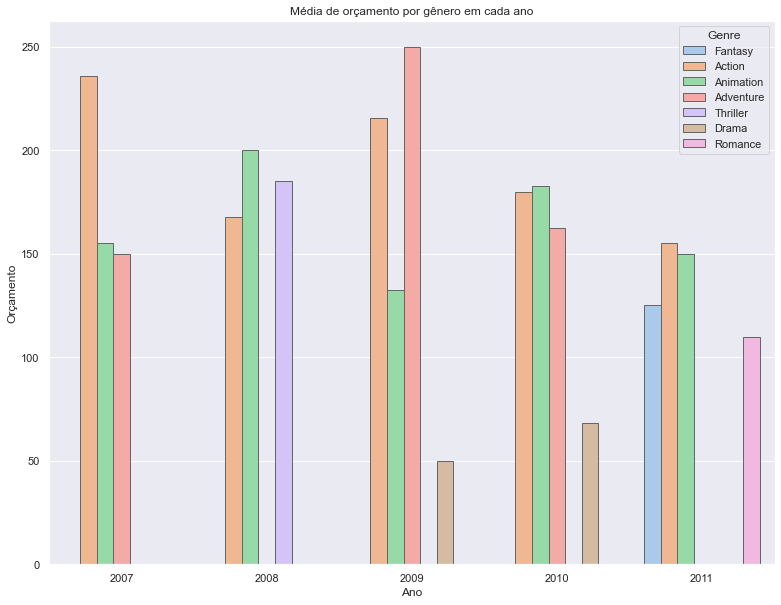

O ano com a maior média de orçamento do gênero Action é 2007
O ano com a maior média de orçamento do gênero Animation é 2008


In [353]:
# Plotando o gráfico do orçamento por gênero de filme em cada ano
sns.set(style='darkgrid')
plt.figure(figsize=(13, 10))
plt.title('Média de orçamento por gênero em cada ano')
sns.barplot(x='Year', y='Budget_M', hue='Genre', color='orange', data=filmes, ci=None, palette='pastel', edgecolor='0.4')
plt.xlabel('Ano')
plt.ylabel('Orçamento')
plt.show()

# Localizando os anos com maiores médias de orçamentos de ação e animação
genres = ['Action', 'Animation']
anos = list(set(filmes['Year']))
media_max = {}

for g in genres:
    
    ano_budget = []
    budget_media = {}

    for i in range(len(np.array(filmes[filmes['Genre'] == g][['Year', 'Budget_M']]))):
        ano_budget.append(list(np.array(filmes[filmes['Genre'] == g][['Year', 'Budget_M']])[i]))

    for k in anos:
        budget_media[k] = 0
        
    for j in range(len(anos)):
        for i in ano_budget:
            if i[0] == anos[j]:
                budget_media[anos[j]] += i[1]
    
        budget_media[anos[j]] /= list(filmes[filmes['Genre'] == g]['Year']).count(anos[j])    

    for i in budget_media.items():
        if i[1] == pd.DataFrame(budget_media.values()).max()[0]:
            media_max[g] = i[0]
    
    print('O ano com a maior média de orçamento do gênero {} é {}'.format(g, media_max[g]))